In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb

In [ ]:
def convert_to_1d_array(data_2d):
    data_1d = []
    
    for point in data_2d:
        data_1d.append(point[0])
        
    return data_1d

In [ ]:
def equal_size_binning(data_1d, nbins=5) :
    max_val = np.max(data_1d)
    min_val = np.min(data_1d)
    
    bin_size = (max_val - min_val)/nbins
    bins = []
    
    for point in data_1d:
        bin_num = (point - min_val) // bin_size
        bins.append(int(bin_num))
        
    return bins

In [ ]:
def create_heatmap_df(data_bins, labels, nbins):
    ref = {
        0 : 'Transient',
        1 : 'Baseline',
        2 : 'Stress',
        3 : 'Amusement',
        4 :'Meditation'
    }
    
    bin_label_count = {}
    
    for label in ref :
        state = ref[label]
        bin_label_count[state] = {}
        for i in range(nbins):
            bin_label_count[state][i] = 0
        
    for (dbin, label) in zip(data_bins, labels):
        if label > 4 or dbin == nbins :
            continue
        
        col = ref[label]
        bin_label_count[col][dbin] += 1
        
    df = pd.DataFrame(bin_label_count).T.fillna(0)
    df[df.columns] = MinMaxScaler().fit_transform(df[df.columns])
    return df

In [76]:
nbins = 5
dict_of_df = {}

for i in range(2, 5):
    if i == 12 :
        continue

    PATH = '../WESAD/S' + str(i) + '/S' + str(i) + '.pkl'
    subject = pd.read_pickle(PATH)
    
    for signal_type in subject['signal']['chest']:
        if signal_type == 'ACC' :
            continue

        data_1d = convert_to_1d_array(subject['signal']['chest'][signal_type])
        data_bins = equal_size_binning(temp_data, nbins)
        # print(data_bins)

        df = create_heatmap_df(data_bins, subject['label'], nbins)
        
        if signal_type not in dict_of_df :
            dict_of_df[signal_type] = {}
            
        dict_of_df[signal_type][str(i)] = df

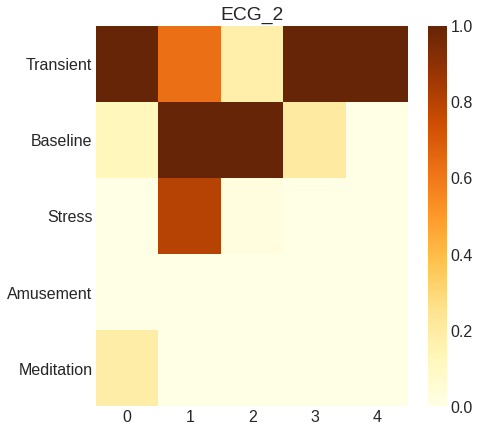

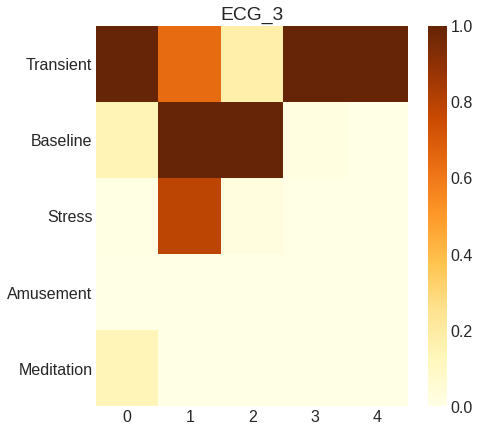

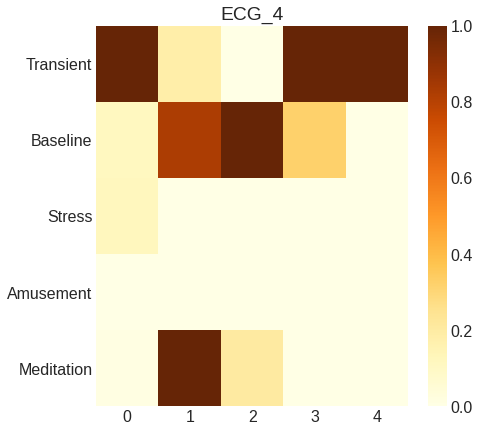

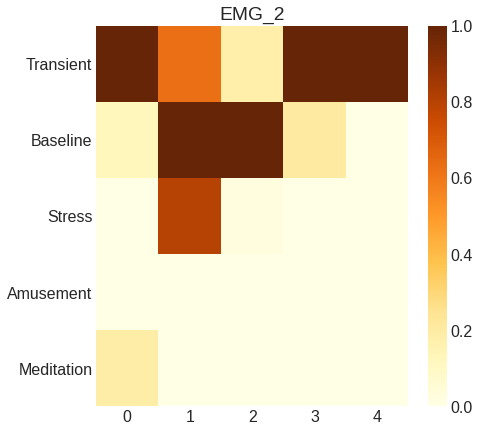

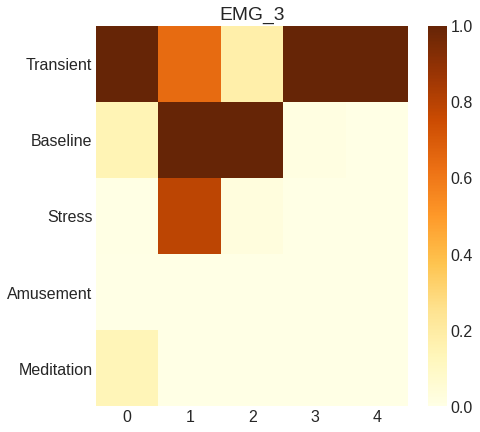

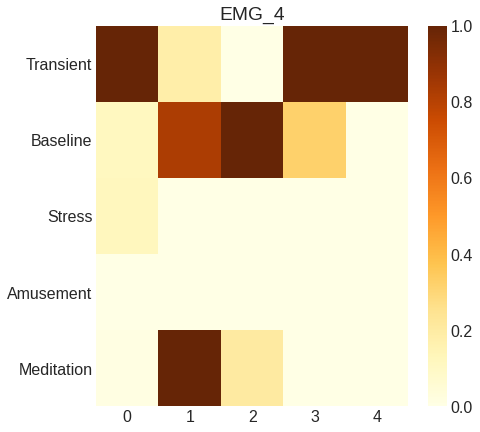

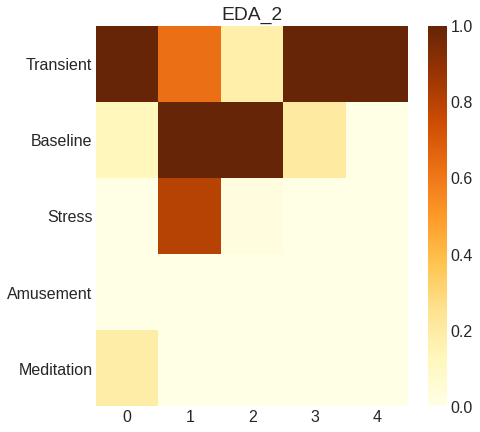

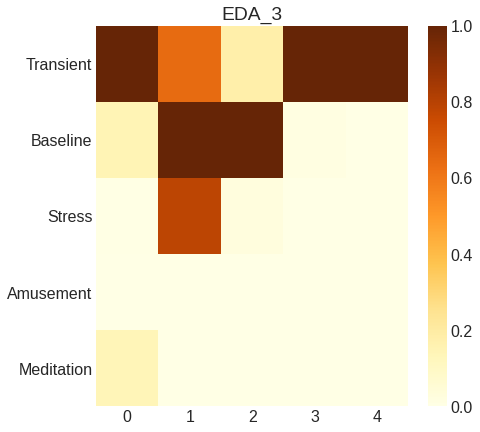

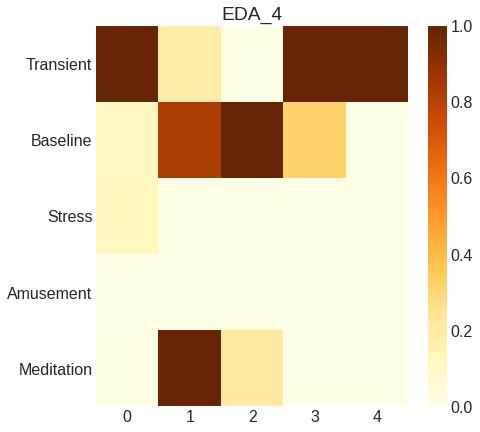

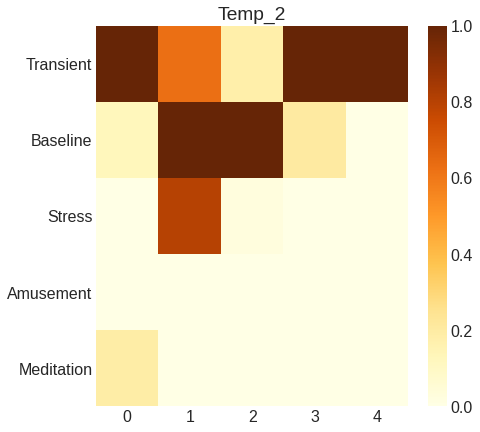

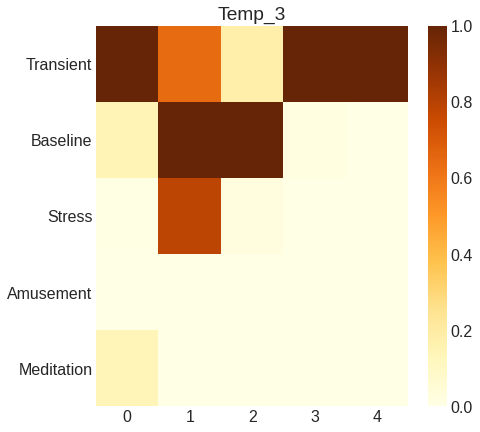

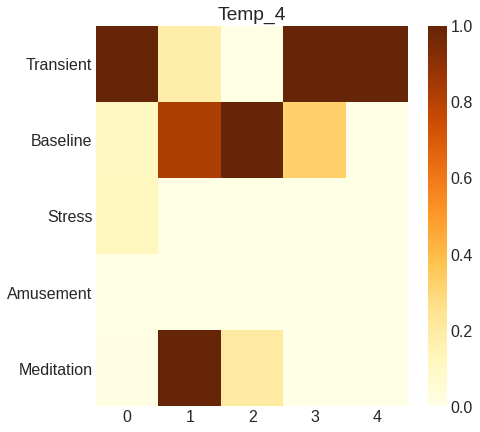

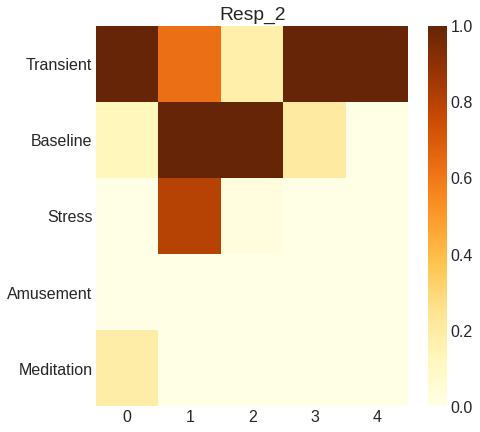

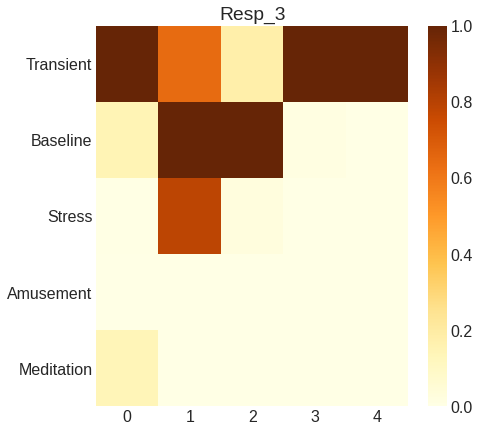

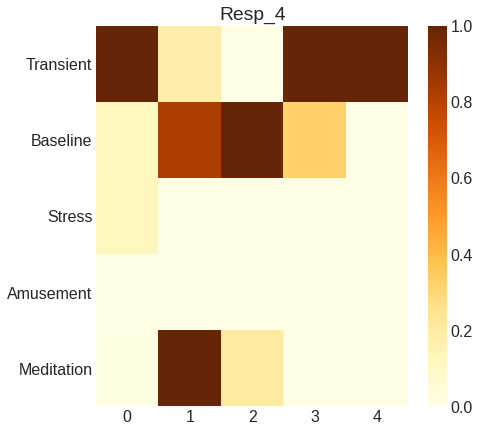

In [77]:
plt.rcParams.update({'font.size': 16})

for signal_type in dict_of_df :
    for subject in dict_of_df[signal_type] :
        plt.figure(figsize=(7, 7))
        df = dict_of_df[signal_type][subject]
        sb.heatmap(df, cmap="YlOrBr").set_title(signal_type + "_" + subject)